In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from collections import Counter
# Simplified example of Stratification + Monte Carlo + Markov Model for Stock Backtesting


In [8]:
# Step 1: Data Preparation
# For demonstration, we use randomly generated data. In practice, use real stock data.
np.random.seed(42)
stock_prices = np.random.normal(100, 15, 1000)  # Simulated daily prices
stock_prices

array([107.4507123 ,  97.92603548, 109.71532807, 122.84544785,
        96.48769938,  96.48794565, 123.68819223, 111.51152094,
        92.95788421, 108.13840065,  93.04873461,  93.0140537 ,
       103.62943407,  71.30079633,  74.12623251,  91.56568706,
        84.80753319, 104.71370999,  86.37963887,  78.81544448,
       121.98473153,  96.61335549, 101.01292307,  78.62877721,
        91.83425913, 101.66383885,  82.73509634, 105.63547028,
        90.99041965,  95.62459375,  90.97440082, 127.78417277,
        99.79754163,  84.13433607, 112.33817368,  81.68734525,
       103.13295393,  70.60494814,  80.07720927, 102.95291854,
       111.0769987 , 102.57052422,  98.26527576,  95.48344457,
        77.82217014,  89.20233687,  93.09041844, 115.85683339,
       105.15427434,  73.55439767, 104.86125954,  94.22376579,
        89.84617   , 109.17514433, 115.46499284, 113.96920179,
        87.41173715,  95.36181436, 104.96895147, 114.63317691,
        92.81238643,  97.21511535,  83.40497539,  82.05

In [10]:
# Step 2: Stratification
# Stratifying based on price ranges for simplicity
bins = [0, 80, 100, 120, np.inf]
strata = pd.cut(stock_prices, bins)
strata[-1]


Interval(100.0, 120.0, closed='right')

In [4]:
# Step 3: Monte Carlo Simulation
# Simulating future price movements based on historical data
def monte_carlo_simulation(data, days, iterations):
    log_returns = np.log(data[1:] / data[:-1])
    mean = np.mean(log_returns)
    variance = np.var(log_returns)
    drift = mean - (0.5 * variance)
    daily_volatility = np.std(log_returns)

    future_prices = np.zeros((days, iterations))
    current_price = data[-1]
    for t in range(days):
        shocks = drift + daily_volatility * norm.ppf(np.random.rand(iterations))
        future_prices[t] = current_price * np.exp(shocks)
        current_price = future_prices[t]
    return future_prices

In [5]:
# Step 4: Markov Model (Simplified)
# Implementing a basic Markov chain where state transitions are based on strata frequencies
transition_matrix = pd.crosstab(pd.Series(strata[:-1], name='Current'),
                                pd.Series(strata[1:], name='Next'),
                                normalize='index')

def markov_chain_simulation(transition_matrix, start_state, days):
    states = list(transition_matrix.columns)
    current_state = start_state
    state_sequence = [current_state]

    for _ in range(days):
        current_state = np.random.choice(states, p=transition_matrix.loc[current_state])
        state_sequence.append(current_state)

    return state_sequence

In [9]:
strata[-1]

Interval(100.0, 120.0, closed='right')

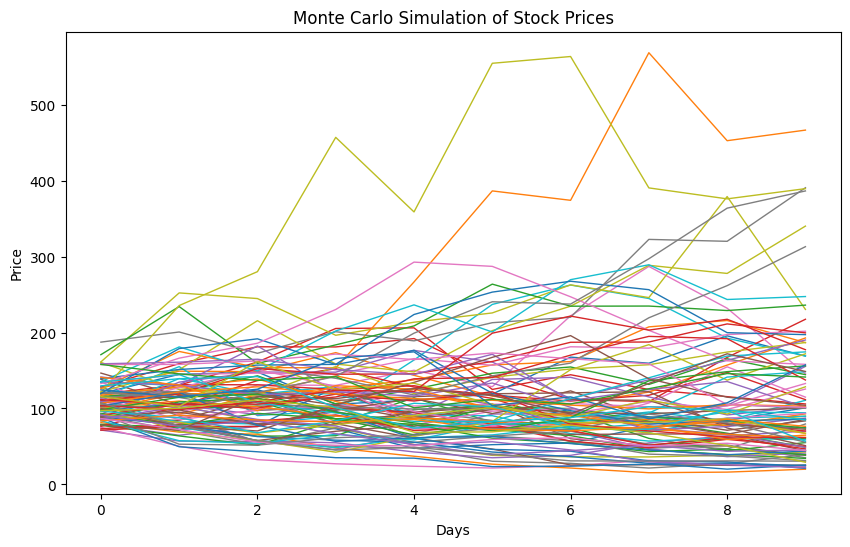

Markov Chain States Sequence: [Interval(100.0, 120.0, closed='right'), Interval(80.0, 100.0, closed='right'), Interval(0.0, 80.0, closed='right'), Interval(80.0, 100.0, closed='right'), Interval(80.0, 100.0, closed='right'), Interval(100.0, 120.0, closed='right'), Interval(100.0, 120.0, closed='right'), Interval(100.0, 120.0, closed='right'), Interval(80.0, 100.0, closed='right'), Interval(120.0, inf, closed='right'), Interval(80.0, 100.0, closed='right')]


In [6]:
# Step 5: Backtesting (Simplified)
# Running a simple backtest where we buy at the start and sell at the end
simulation_days = 10
mc_iterations = 100
start_state = strata[-1]
mc_prices = monte_carlo_simulation(stock_prices, simulation_days, mc_iterations)
markov_states = markov_chain_simulation(transition_matrix, start_state, simulation_days)

# Visualizing the Monte Carlo simulation
plt.figure(figsize=(10, 6))
for i in range(mc_iterations):
    plt.plot(mc_prices[:, i], linewidth=1)
plt.title('Monte Carlo Simulation of Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Displaying Markov chain states
print("Markov Chain States Sequence:", markov_states)
